<a href="https://colab.research.google.com/github/gopaps/MachineLearning/blob/main/week%205/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reproduce dan pahami EDA:data.csv



In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Import library yang diperlukan
from google.colab import drive # Import the drive object from google.colab

# Mount Google Drive agar dapat mengakses file
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset dari Google Drive
# Sesuaikan path file dataset dengan lokasi yang ada di Google Drive Anda
file_path = '/content/drive/My Drive/dataset/data.csv'
car_data = pd.read_csv(file_path)

In [ ]:
# Menampilkan beberapa baris pertama untuk memastikan data berhasil dimuat
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# 3. Memeriksa informasi dataset untuk melihat jenis data dan missing values
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# 4. Menampilkan statistik deskriptif untuk fitur numerik
car_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


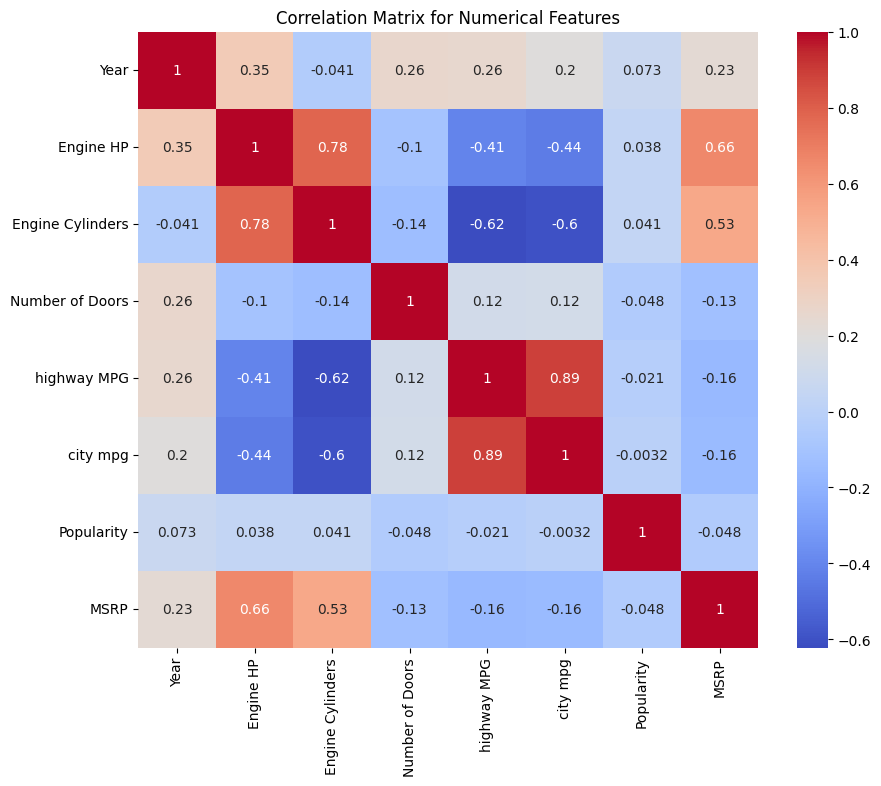

In [ ]:
# Memilih hanya kolom numerik untuk membuat matriks korelasi
numeric_data = car_data.select_dtypes(include=['float64', 'int64'])

# Visualisasi korelasi antar fitur numerik menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()



In [ ]:
# Mengisi missing values pada kolom numerik dengan nilai median
car_data['Engine HP'] = car_data['Engine HP'].fillna(car_data['Engine HP'].median())
car_data['Engine Cylinders'] = car_data['Engine Cylinders'].fillna(car_data['Engine Cylinders'].median())
car_data['Number of Doors'] = car_data['Number of Doors'].fillna(car_data['Number of Doors'].median())


In [ ]:
# Mengisi missing values pada kolom kategorikal dengan 'Unknown'
car_data['Engine Fuel Type'] = car_data['Engine Fuel Type'].fillna('Unknown')
car_data['Market Category'] = car_data['Market Category'].fillna('Unknown')

In [ ]:

# 8. Memilih kolom-kolom fitur dan target
X = car_data[['Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type',
              'Driven_Wheels', 'Number of Doors', 'Vehicle Size', 'Vehicle Style',
              'highway MPG', 'city mpg', 'Popularity']]
y = car_data['MSRP']


In [ ]:
# 9. Menentukan kolom kategorikal dan numerik
categorical_features = ['Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']



In [ ]:
# 10. Menyusun transformer untuk standarisasi kolom numerik dan OneHotEncoding untuk kolom kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [ ]:
# 11. Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 12. Membuat pipeline regresi linear biasa
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])


In [ ]:
# 13. Melatih model regresi linear
linear_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Engine HP',
                                                   'Engine Cylinders',
                                                   'Number of Doors',
                                                   'highway MPG', 'city mpg',
                                                   'Popularity']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style'])])),
                ('regressor', LinearRegression())])

In [ ]:
# 14. Melakukan prediksi dengan model regresi linear pada data testing
y_pred_linear = linear_pipeline.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# 15. Menghitung metrik evaluasi (RMSE, MSE, R-Squared) untuk regresi linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)  # Menghitung RMSE dari MSE secara manual
r2_linear = r2_score(y_test, y_pred_linear)


In [ ]:
# 16. Menambahkan fitur polinomial (derajat 2) untuk regresi linear berbasis fungsi
poly_features = PolynomialFeatures(degree=2, include_bias=False)


In [ ]:
# 17. Membuat pipeline regresi linear dengan basis fungsi polinomial
poly_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('poly_features', poly_features),
                                ('regressor', LinearRegression())])


In [ ]:
# 18. Melatih model regresi linear dengan basis fungsi
poly_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Engine HP',
                                                   'Engine Cylinders',
                                                   'Number of Doors',
                                                   'highway MPG', 'city mpg',
                                                   'Popularity']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style'])])),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('regressor', LinearRegression())])

In [ ]:
# 19. Melakukan prediksi dengan model polinomial pada data testing
y_pred_poly = poly_pipeline.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 20. Menghitung metrik evaluasi (RMSE, MSE, R-Squared) untuk regresi linear dengan basis fungsi
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)  # Menghitung RMSE dari MSE secara manual
r2_poly = r2_score(y_test, y_pred_poly)

In [ ]:
# Menampilkan hasil evaluasi untuk model regresi linear berbasis fungsi
print("\nHasil Evaluasi Regresi Linear dengan Basis Fungsi (Polinomial):")
print("RMSE:", rmse_poly)
print("MSE:", mse_poly)
print("R-Squared:", r2_poly)


Hasil Evaluasi Regresi Linear dengan Basis Fungsi (Polinomial):
RMSE: 12713974849302.822
MSE: 1.6164515646870474e+26
R-Squared: -6.781640896424369e+16


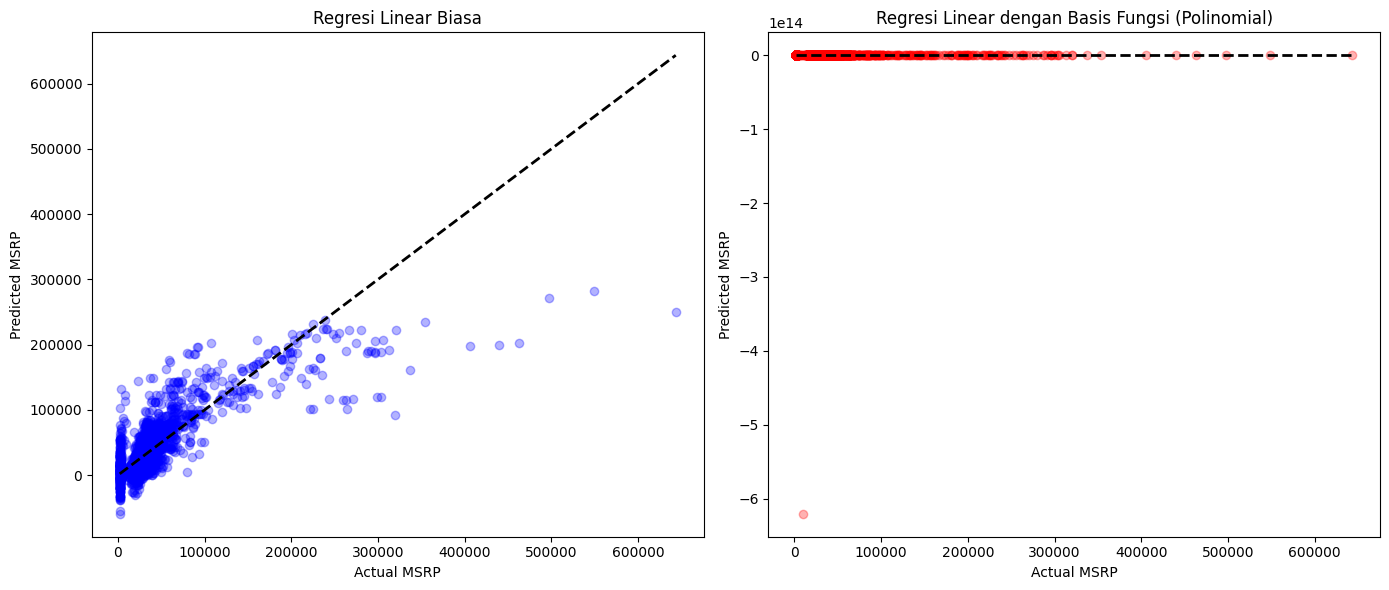

In [ ]:
# Membuat scatter plot untuk membandingkan hasil prediksi dengan nilai aktual untuk regresi linear biasa
plt.figure(figsize=(14, 6))

# Plot untuk regresi linear biasa
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual MSRP')
plt.ylabel('Predicted MSRP')
plt.title('Regresi Linear Biasa')

# Plot untuk regresi polinomial
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.3, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual MSRP')
plt.ylabel('Predicted MSRP')
plt.title('Regresi Linear dengan Basis Fungsi (Polinomial)')

plt.tight_layout()
plt.show()

# Reproduce dan pahami EDA:diabetes_dataset.csv

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load dataset Diabetes dari Google Drive atau path yang sesuai
diabetes_file_path ='/content/drive/My Drive/dataset/diabetes_dataset.csv'  # Ubah path sesuai lokasi file Anda
diabetes_data = pd.read_csv(diabetes_file_path)


In [ ]:
# 1. Menampilkan beberapa baris awal dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 2. Memeriksa informasi dataset untuk melihat jenis data dan missing values
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 3. Menampilkan statistik deskriptif untuk fitur numerik
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


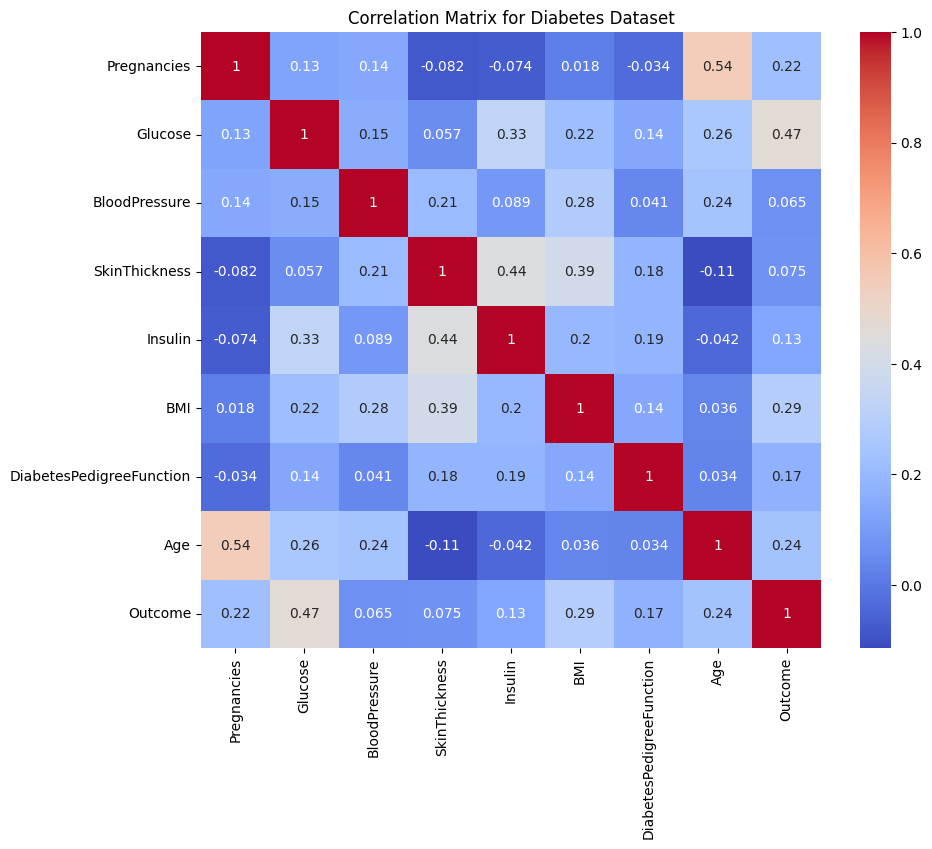

In [ ]:
# 4. Visualisasi korelasi antar fitur numerik menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Diabetes Dataset')
plt.show()

In [ ]:
# Mengisi missing values pada kolom dengan nilai 0 yang seharusnya missing
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    diabetes_data[col] = diabetes_data[col].replace(0, np.nan)
    diabetes_data[col] = diabetes_data[col].fillna(diabetes_data[col].median())


In [ ]:
# 6. Memilih kolom-kolom fitur dan target
X = diabetes_data.drop(columns='Outcome')
y = diabetes_data['Outcome']

In [ ]:
# 7. Menyusun transformer untuk standarisasi fitur numerik
preprocessor = StandardScaler()

In [ ]:
# 8. Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 9. Membuat pipeline untuk regresi linear biasa
linear_pipeline = Pipeline(steps=[('scaler', preprocessor),
                                  ('regressor', LinearRegression())])


In [ ]:
# 10. Melatih model regresi linear
linear_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [ ]:
# 11. Melakukan prediksi dengan model regresi linear pada data testing
y_pred_linear = linear_pipeline.predict(X_test)


In [ ]:
# 12. Menghitung metrik evaluasi (RMSE, MSE, R-Squared) untuk regresi linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)  # Menghitung RMSE dari MSE secara manual
r2_linear = r2_score(y_test, y_pred_linear)


In [ ]:
# Menampilkan hasil evaluasi untuk model regresi linear biasa
print("Hasil Evaluasi Regresi Linear Biasa:")
print("RMSE:", rmse_linear)
print("MSE:", mse_linear)
print("R-Squared:", r2_linear)


Hasil Evaluasi Regresi Linear Biasa:
RMSE: 0.4058818794678368
MSE: 0.16474010008034362
R-Squared: 0.2824653418722809


In [ ]:
# 13. Menambahkan fitur polinomial (derajat 2) untuk regresi linear berbasis fungsi
poly_features = PolynomialFeatures(degree=2, include_bias=False)


In [ ]:
# 14. Membuat pipeline untuk regresi linear dengan basis fungsi polinomial
poly_pipeline = Pipeline(steps=[('scaler', preprocessor),
                                ('poly_features', poly_features),
                                ('regressor', LinearRegression())])


In [ ]:
# 15. Melatih model regresi linear dengan basis fungsi
poly_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('regressor', LinearRegression())])

In [ ]:
# 16. Melakukan prediksi dengan model polinomial pada data testing
y_pred_poly = poly_pipeline.predict(X_test)


In [ ]:
# 17. Menghitung metrik evaluasi (RMSE, MSE, R-Squared) untuk regresi linear dengan basis fungsi
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)  # Menghitung RMSE dari MSE secara manual
r2_poly = r2_score(y_test, y_pred_poly)


In [ ]:
# Menampilkan hasil evaluasi untuk model regresi linear dengan basis fungsi
print("\nHasil Evaluasi Regresi Linear dengan Basis Fungsi (Polinomial):")
print("RMSE:", rmse_poly)
print("MSE:", mse_poly)
print("R-Squared:", r2_poly)



Hasil Evaluasi Regresi Linear dengan Basis Fungsi (Polinomial):
RMSE: 0.4296845209246973
MSE: 0.1846287875222866
R-Squared: 0.19583905879181818


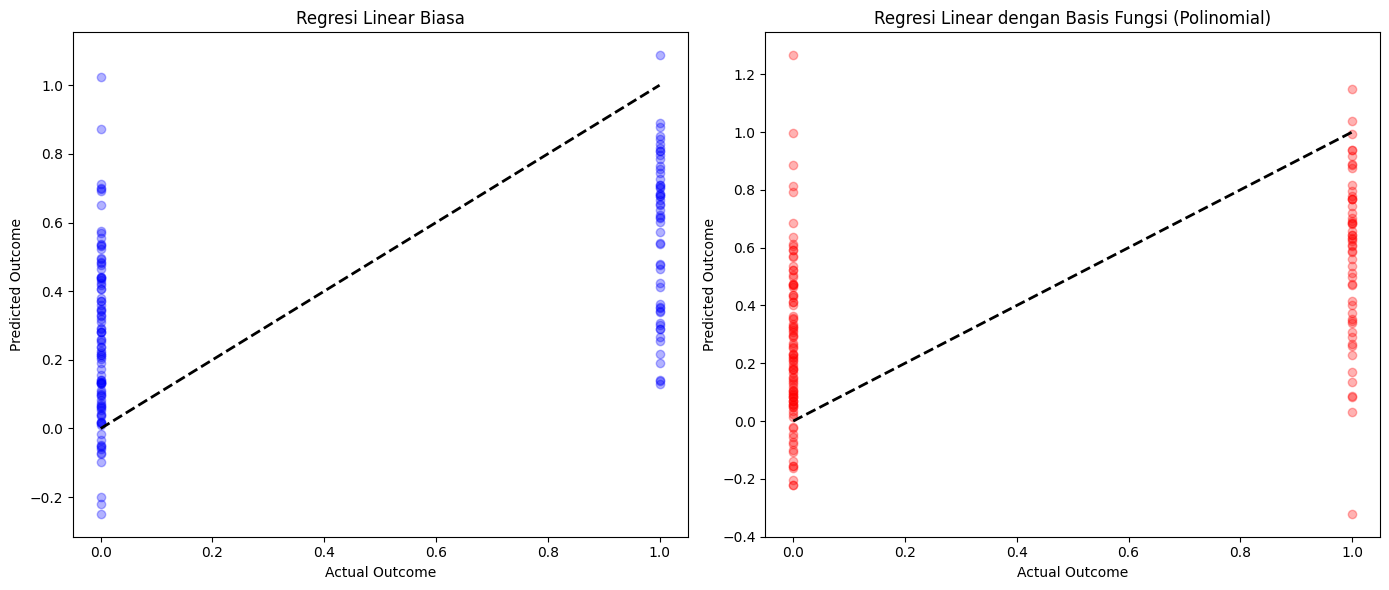

In [ ]:
# 18. Visualisasi perbandingan prediksi untuk model regresi linear biasa dan polinomial
plt.figure(figsize=(14, 6))

# Plot untuk regresi linear biasa
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.title('Regresi Linear Biasa')

# Plot untuk regresi polinomial
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.3, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.title('Regresi Linear dengan Basis Fungsi (Polinomial)')

# Menampilkan seluruh plot
plt.tight_layout()
plt.show()
